In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('weather-2021-preprocessed.csv')
df.head()

,Time,Temperature,Heat Index,Temperature Feels Like,Dew Point,Humidity,Wind Force,Wind Speed,Pressure,UV Description,UV Index,Condition
0,2021-01-01 00:00:00,75,75.0,75.0,61.0,61.0,6.0,8,29.85,Low,0,Cloudy
1,2021-01-01 00:30:00,75,75.0,75.0,61.0,61.0,6.0,7,29.85,Low,0,Cloudy
2,2021-01-01 01:00:00,75,75.0,75.0,61.0,61.0,6.0,7,29.82,Low,0,Cloudy
3,2021-01-01 01:30:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy
4,2021-01-01 02:00:00,73,73.0,73.0,61.0,65.0,4.0,6,29.82,Low,0,Cloudy


## Câu hỏi 1:

### Nội dung câu hỏi
Mối tương quan giữa nhiệt độ và chỉ số UV là gì?

### Lợi ích khi trả lời câu hỏi
Giúp ta biết được mối tương quan chung giữa nhiệt độ và chỉ số UV; đồng thời, dựa trên mối tương quan đó theo từng mức độ UV, ta có thể biết mức độ nào tương ứng với khoảng nhiệt độ và chỉ số UV nào.

### Nguồn cảm hứng của câu hỏi
Nhóm tự suy nghĩ từ trong quá trình khám phá dữ liệu.

### Phân tích dữ liệu để trả lời cho câu hỏi
Trực quan hóa dữ liệu bằng jointplot (seaborn), trong đó:
- Trục hoành: Nhiệt độ
- Trục tung: Chỉ số UV
- Trục hue: Mức độ UV

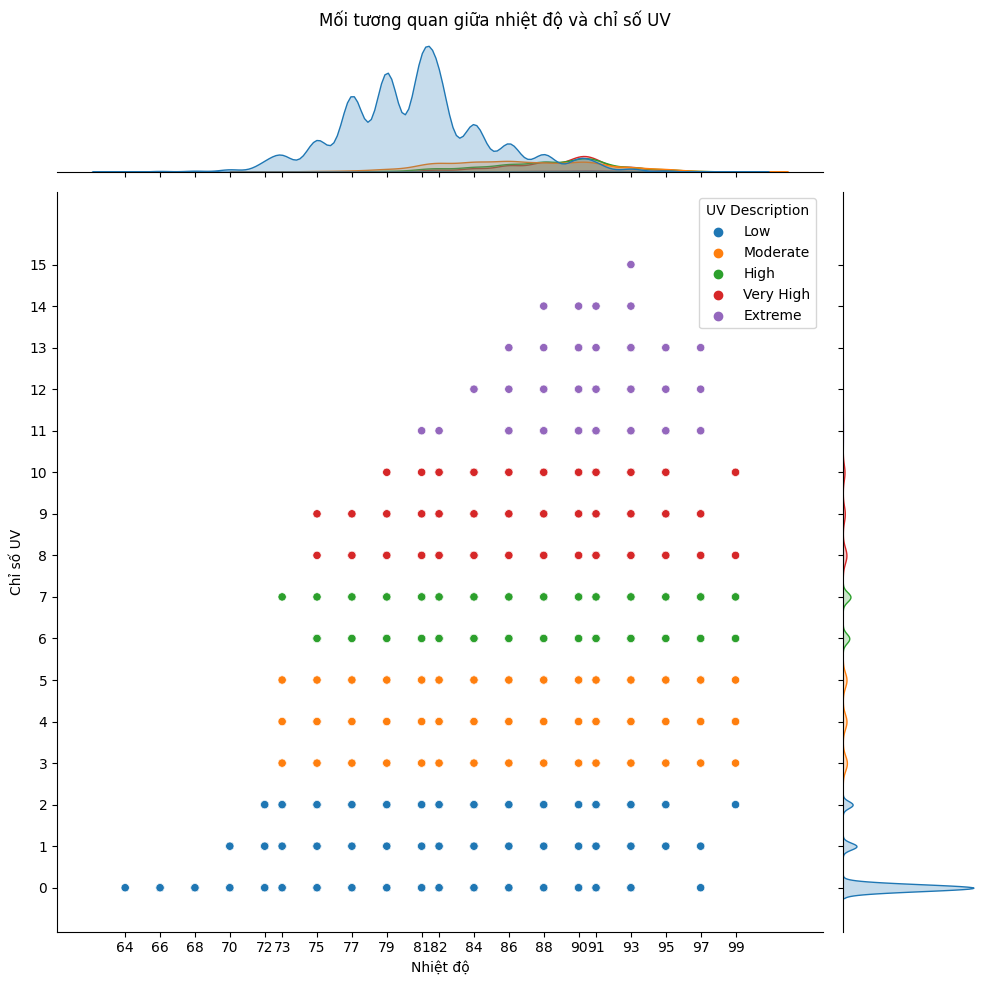

In [15]:
p = sns.jointplot(data=df, x='Temperature', y='UV Index', hue='UV Description', height=10)
p.fig.suptitle('Mối tương quan giữa nhiệt độ và chỉ số UV')
p.ax_joint.set_xlabel('Nhiệt độ')
p.ax_joint.set_ylabel('Chỉ số UV')
p.ax_joint.set_xticks(df['Temperature'].unique())
p.ax_joint.set_yticks(df['UV Index'].unique())
p.fig.tight_layout()

### Nhận xét:
- Mối tương quan chung giữa nhiệt độ và chỉ số UV là chỉ số UV càng tăng thì khoảng nhiệt độ càng thu hẹp và có xu hướng lệch về phía nhiệt độ cao.
- Các mức độ UV:
    - Thấp (Low):
        - Khoảng chỉ số UV từ 0 đến 2.
        - Khoảng nhiệt độ từ 64°F đến 99°F.
        - Chỉ số UV bằng 0 có khoảng nhiệt độ trải dài nhất và hơn hẳn các chỉ số còn lại.
    - Vừa (Moderate), Cao (High):
        - Khoảng chỉ số UV lần lượt từ 3 đến 5 và từ 6 đến 7.
        - Khoảng nhiệt độ từ 73°F đến 99°F.
    - Rất Cao (Very High):
        - Khoảng chỉ số UV lần lượt từ 8 đến 10.
        - Khoảng nhiệt độ từ 73°F đến 99°F.
    - Cực Độ (Extreme):
        - Khoảng chỉ số UV lần lượt từ 11 đến 15.
        - Khoảng nhiệt độ từ 81°F đến 97°F và thu hẹp đáng kể theo chiều tăng chỉ số UV.

## Câu hỏi 2:

### Nội dung câu hỏi
Nhiệt độ trung bình trong ngày theo từng tháng như thế nào?

### Lợi ích khi trả lời câu hỏi
Giúp ta biết được trung bình nhiệt độ theo giờ trong ngày theo từng tháng. Từ đó, đưa ra kết luận về khoảng thời gian nóng hay lạnh trong ngày theo từng tháng.

### Nguồn cảm hứng của câu hỏi
Từ Lab 3 môn Nhập môn Khoa học dữ liệu.

### Phân tích dữ liệu để trả lời cho câu hỏi
Bước 1: Tạo dataframe là một ma trận 24x12 chứa trung bình nhiệt độ theo giờ trong ngày theo từng tháng.

Bước 2: Trực quan hóa dữ liệu bằng heatmap (seaborn) từ dataframe vừa tạo.

Code bước 1:

In [16]:
df['Time'] = pd.to_datetime(df['Time'])

mean_temp_per_h_each_m = df[['Temperature', 'Time']].groupby([df['Time'].dt.hour, df['Time'].dt.month]).mean()

t = []
for i in range(1, 13):
    t.append(mean_temp_per_h_each_m[mean_temp_per_h_each_m.index.get_level_values(1) == i].values.flatten())

mean_temp_per_h_each_m = pd.DataFrame(np.flip(np.asarray(t).transpose(), 0))
mean_temp_per_h_each_m.columns = np.array(range(1, 13))
mean_temp_per_h_each_m

C:\Users\Admin\AppData\Local\Temp\ipykernel_16176\1313182272.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_temp_per_h_each_m = df[['Temperature', 'Time']].groupby([df['Time'].dt.hour, df['Time'].dt.month]).mean()


,1,2,3,4,5,6,7,8,9,10,11,12
0,77.145161,77.178571,81.209677,82.333333,82.677419,81.250000,80.590164,79.612903,78.866667,79.096774,79.716667,77.866667
1,78.193548,77.928571,81.725806,82.627119,83.016129,81.694915,80.983607,79.822581,78.916667,79.209677,80.450000,78.716667
2,78.741935,78.490909,82.241935,83.116667,83.540984,82.233333,81.241935,80.225806,79.433333,79.193548,81.000000,79.500000
3,79.564516,79.428571,82.967742,83.516667,84.065574,82.800000,81.688525,80.435484,80.083333,79.354839,81.576271,80.066667
4,80.459016,80.000000,84.145161,84.133333,84.700000,83.186441,82.000000,81.193548,80.366667,80.016129,82.355932,80.700000
5,81.548387,80.839286,85.596774,85.800000,85.786885,84.700000,83.096774,82.645161,80.950000,80.919355,82.966667,81.850000
6,83.612903,83.553571,88.209677,87.716667,86.606557,86.300000,84.387097,84.612903,82.450000,82.262295,84.216667,84.118644
7,86.161290,86.321429,90.774194,89.500000,87.854839,87.200000,86.048387,86.483871,84.216667,84.209677,85.933333,86.457627
8,88.048387,87.964286,92.951613,90.533333,89.245902,89.150000,87.564516,88.129032,85.666667,85.933333,86.983333,87.949153
9,88.145161,88.892857,93.716667,91.066667,89.790323,90.400000,87.967742,88.741935,86.250000,86.934426,87.933333,88.483333


Code bước 2:

Text(50.722222222222214, 0.5, 'Giờ')

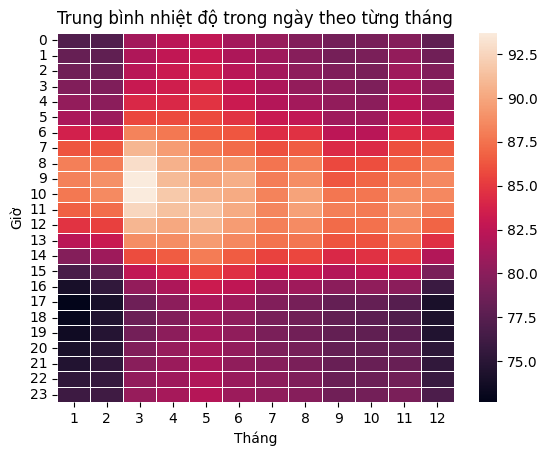

In [17]:
sns.heatmap(mean_temp_per_h_each_m, linewidth = 0.5)
plt.title('Trung bình nhiệt độ trong ngày theo từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Giờ')

### Nhận xét:
- Khoảng thời gian nóng trong ngày (trung bình từ 85°F) phình to từ tháng 3 đến tháng 8, cho thấy tại những tháng này thời gian nóng trong ngày là dài nhất. Đồng thời, cũng ở những tháng này, nhiệt độ trung bình trong ngày không dưới 80°F nến có thể kết luận đây là những tháng nóng trong năm.
- Khoảng thời gian nóng trong ngày co lại ở những tháng còn lại. Đặc biệt, các tháng 1, 2 và 12 có những thời điểm nhiệt độ trung bình trong ngày hạ xuống dưới 75°F, ta nhận định đây là những tháng lạnh trong năm.
- Nhiệt độ trung bình cao nhất năm rơi (trên 92,5°F) vào từ 9 đến 10 giờ ở tháng 3.
- Nhiệt độ trung bình thấp nhất năm rơi (dưới 75°F) vào từ 17 đến 19 giờ ở tháng 1.

## Câu hỏi 3

### Nội dung câu hỏi

Sự tương quan giữa nhiệt độ không khí, nhiệt độ điểm sương điểm sương và độ ẩm 

### Lợi ích khi trả lời câu hỏi

Giúp ta biết được sự tương quan chung giữa 3 chỉ số thời tiết quan trọng: nhiệt độ không khí, nhiệt độ điểm sương và đọ ẩm

### Nguồn cảm hứng của câu hỏi

Nhóm tự nghĩ ra khi khám phá dữ liệu

### Phân tích dữ liệu để trả lời câu hỏi

Ta cần phải tính được nhiệt độ, điểm sương và độ ẩm trung bình mỗi tháng là bao nhiêu

Đầu tiên, ta gom các giá trị lại theo từng tháng bằng `groupby` sau đó dùng `sum()` để tính tổng các giá trị

Tiếp theo, ta đem giá trị vừa tính được chia cho số giá trị của từng tháng. Ta dùng `value_counts()` để đếm tổng số giá trị và dùng `sort_index()` để sắp xếp index lại theo đúng thứ tự của các tháng trong năm

Lưu các giá trị vừa tìm được vào các biến `avg_temperature`, `avg_dew_point`, `avg_humidity` tương ứng với nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm trung bình qua từng tháng

In [18]:
#Nhiệt độ điểm sương trung bình mỗi tháng
avg_dew_point = df['Dew Point'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()
#Độ ẩm trung bình mỗi tháng
avg_humidity = df['Humidity'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()
#Nhiệt độ trung bình mỗi tháng
avg_temperature = df['Temperature'].groupby(df['Time'].dt.month).sum()/df['Time'].dt.month.value_counts().sort_index()

### Vẽ biểu đồ thể hiện sự tương quan giữa nhiệt độ không khí, nhiệt độ điểm sương và độ ẩm 


Dùng bar chart để vẽ giá trị độ ẩm

Dùng line chart để thể hiện nhiệt độ không khí và điểm sương

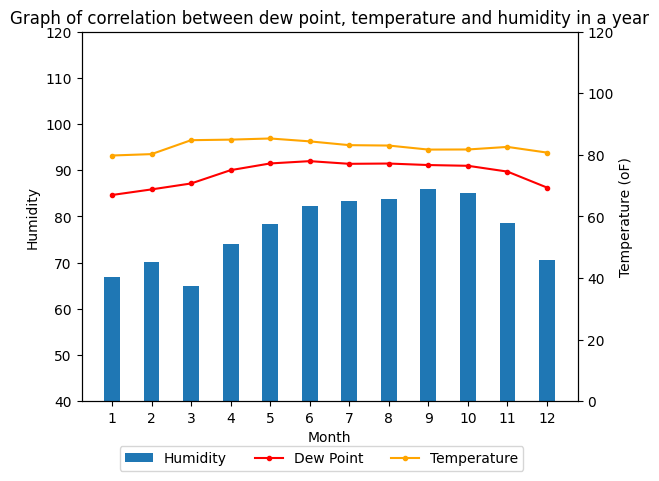

In [19]:
month_list = [i for i in range(1,13)] #cac thang trong nam
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(np.array(month_list), avg_humidity,label='Humidity',width=0.4)
ax1.set_ylabel('Humidity')
ax1.set_xlabel('Month')
ax1.set_ylim(40,120)
ax1.set_xticks((month_list))
ax2 = ax1.twinx()
ax2.plot(month_list, avg_dew_point,color='red', marker='.',label='Dew Point')
ax2.plot(month_list, avg_temperature,color='orange', marker='.',label='Temperature')

ax2.set_ylim(0,120)
plt.title('Graph of correlation between dew point, temperature and humidity in a year')
ax2.set_ylabel('Temperature (oF)')
fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05));

Nhận xét:

- Nhiệt độ phân bố tương đối đều giữa các tháng, độ chênh lệch giữa tháng có nhiệt độ cao nhất và tháng có nhiệt độ thấp nhất là rất thấp
- Độ ẩm trong không khí cao, hầu hết các tháng đều có độ ẩm trung bình trên 70% (trừ tháng 1 và tháng 3)
- Nhiệt độ điểm sương gần như là tỉ lệ thuận với nhiệt độ không khí. Khi độ ẩm càng cao thì nhiệt độ điểm sương càng gần với nhiệt độ không khí

## Câu hỏi 4

### Nội dung câu hỏi

Các điều kiện thời tiết phân bố như thế nào trong năm?

### Lợi ích khi trả lời câu hỏi

Giúp chúng ta nắm rõ được điều kiện thời tiết như thế nào trong năm để có thể có sự chuẩn bị trước cho thời tiết sắp tới. Đặc biệt là khách du lịch hoặc những người mới chuyển vào sinh sống ở đây

### Nguồn cảm hứng của câu hỏi

Trải nghiệm của bản thân trong năm đầu tiên vào học và sinh sống ở TPHCM

### Phân tích dữ liệu cho câu hỏi


Dùng `groupby` để gom nhóm các điều kiện thời tiết ở cột `Condition` theo từng tháng

In [20]:
condition = df.groupby(df['Time'].dt.month)['Condition'].value_counts()

Lưu giá trị vào dictionary `dict_condition` với `key` là các điều kiện thời tiết, `value` là 1 dictionary khác với key là các tháng trong năm và value là số giờ xuất hiện điều kiện thời tiết đó trong tháng

In [21]:
month_list = [i for i in range(1,13)] #cac thang trong nam
dict_condition = {}
for i in df['Condition'].unique():
    dict_condition[i] = {}
for i in df['Condition'].unique():
    for j in month_list:
        dict_condition[i][j] = 0
for i in condition.index:
    dict_condition[i[1]][i[0]] =  condition[(i[0],i[1])]/2

### Vẽ biểu đồ phân bố các điều kiện thời tiết

Vẽ 1 biểu đồ trong đó có 6 biểu đồ con tương ứng với mỗi điều kiện thời tiết
- Trục hoành là các tháng trong năm
- Trục tung là số giờ

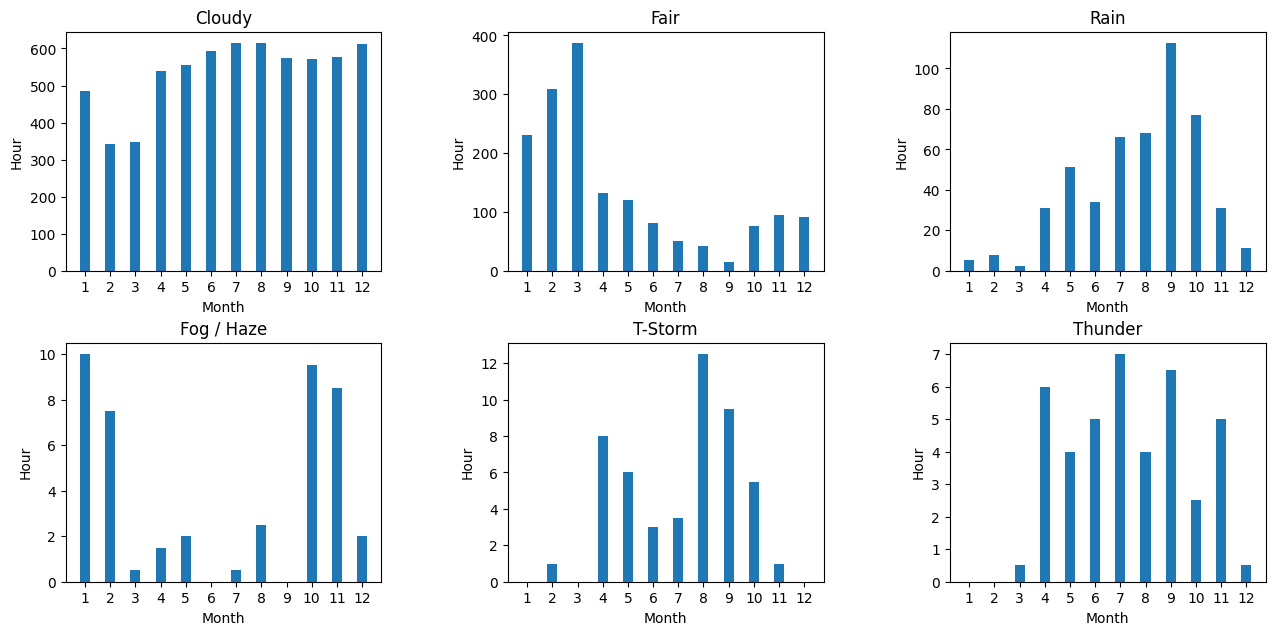

In [25]:
fig, axs = plt.subplots(2, 3,figsize=(15,5))

id = 0
for row in range(0,2):
    for col in range(0,3):
        title = df['Condition'].unique()[id]
        axs[row,col].bar(dict_condition[title].keys(), dict_condition[title].values(),width=0.4)
        axs[row,col].set_xticks((month_list))
        axs[row,col].set_title(title)
        axs[row,col].set_ylabel('Hour')
        axs[row,col].set_xlabel('Month')
        id +=1
plt.subplots_adjust(left=0.1,
                    bottom=-0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.3)

Nhận xét:
- Tổng quát:
    - Điều kiện thời tiết Cloudy (có mấy), Fair (đẹp) và Rain (mưa)  chiếm phần lớn trong năm
    - Các kiểu thời tiết: Fog/Haze (sương mù), T-Storm (giông), và Thunder (sấm sét) xuất hiện ít trong năm với tháng cao nhất chỉ khoảng 13h/tháng 

- Cụ thể:
    - Cloudy:
        - Xuất hiện rất thường xuyên trong năm (trên 300h mỗi tháng), chỉ có tháng 1, 2 và 3 là dưới 500h mỗi tháng, còn lại đều trên 500h
    - Fair:
        - Xuất hiện nhiều vào các tháng đầu năm (tháng 1,2,3) với hơn 200h mỗi tháng, cao điểm nhất là tháng 3 với gần 400h
        - Các tháng còn lại trong năm thời gian xuất hiện ít, dưới 150h/tháng, chạm đáy là tháng 9 (vì lúc này là đỉnh điểm của mùa mưa)
    - Rain:
        - Mưa ít ở các tháng đầu năm và cuối năm (tháng 1,2,3,11,12) với thời gian mưa chỉ dưới 20h/tháng
        - Mưa nhiều bắt đầu từ tháng 7 đến tháng 10 --> mùa mưa bắt đầu, đỉnh điểm là tháng 9 với gần 120h mưa 
    - Fog / Haze:
        - Sương mù nhiều vào các tháng đầu và cuối năm (tháng 1,2,10,11) với thời gian trên 6h/tháng
        - Sương mù xảy ra ít vào các tháng giữa năm (từ tháng 3 đến tháng 9)
    - T-Storm:
        - Mưa giông xảy ra nhiều từ tháng 4 đến tháng 10, nhiều nhất vào tháng 8 và tháng 9, đặc biệt là tháng 8
        --> Nguyên nhân: lúc đó là thời gian bước vào mùa mưa cho nên giông xuất hiện nhiều
    - Thunder:
        - Sấm sét phân bố khá đều ở các tháng giữa và cuối năm (từ tháng 1 đến tháng 11)
        --> Nguyên nhân: Thông thường sấm sét thường đi kèm với mưa giông
        - Xuất hiện ít vào 3 tháng đầu năm (tháng 1,2,3) và tháng 12
        --> Nguyên nhân: vào 3 tháng đầu năm là mùa xuân, thời tiết đẹp nên ít xảy ra sấm sét. Tháng 12 ít sấm sét vì lúc đó đã bắt đầu kết thúc mùa mưa chuyển sang mùa nắng